In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_wine = pd.read_csv(r'C:\Users\maxim.korolev\PycharmProjects\pml\datapreprocessing\wine.data')
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nСобственные значения \n%s' % eigen_vals)


Собственные значения 
[4.72347249 2.60021207 1.62375982 0.95668942 0.78437277 0.58741893
 0.47019454 0.36535702 0.10134597 0.15078365 0.20169257 0.2853664
 0.25589174]


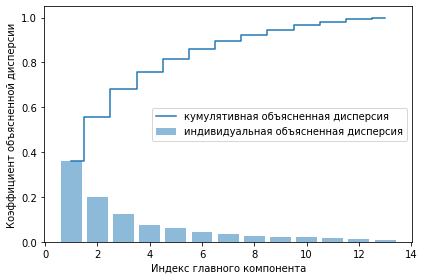

In [11]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='индивидуальная объясненная дисперсия')
plt.step(range(1, 14), cum_var_exp, where='mid', label='кумулятивная объясненная дисперсия')
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Матрица W: \n', w)

Матрица W: 
 [[ 0.14639736 -0.47342117]
 [-0.25558253 -0.27374399]
 [ 0.05496462 -0.25667389]
 [-0.18542945  0.03376259]
 [ 0.16932836 -0.31874742]
 [ 0.40363206 -0.04273843]
 [ 0.4249026   0.0238643 ]
 [-0.30048303  0.00458551]
 [ 0.31981751 -0.01634526]
 [-0.06158608 -0.54024202]
 [ 0.29063751  0.27952849]
 [ 0.37721952  0.19185343]
 [ 0.28385943 -0.35046494]]


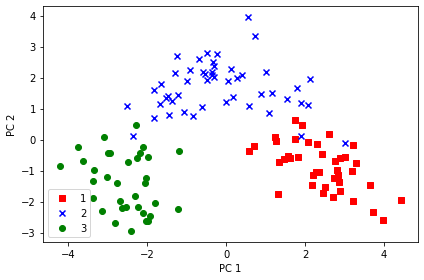

In [18]:
# X_train_std[0].dot(w)
X_train_pca = X_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('РС 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

C:\Users\maxim.korolev\PycharmProjects\pml\commons.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


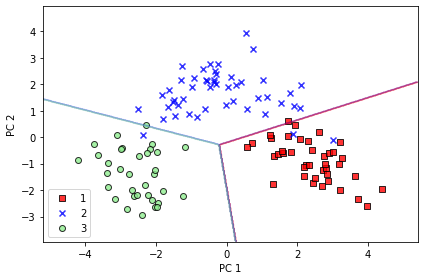

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from commons import plot_decision_regions

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')
# понижение размерности:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# подгонка модели, основанной на логистической регрессии,
# к сокращенному набору данных:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('РС 1')
plt.ylabel('РС 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

C:\Users\maxim.korolev\PycharmProjects\pml\commons.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


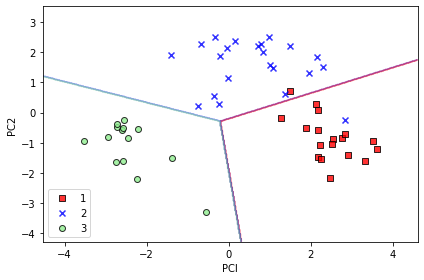

In [26]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PCl')
plt.ylabel('РС2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [27]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36039002, 0.19839016, 0.12388912, 0.07299319, 0.05984583,
       0.04481871, 0.03587476, 0.02787589, 0.0217728 , 0.01952395,
       0.01538868, 0.01150444, 0.00773246])

## LDA

In [30]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('МV %s: %s\n' % (label, mean_vecs[label - 1]))

МV 1: [ 0.9296 -0.3566  0.3283 -0.7098  0.5307  0.9213  0.9733 -0.6363  0.5967
  0.2046  0.5101  0.7783  1.172 ]

МV 2: [-0.9213 -0.3862 -0.381   0.2721 -0.448  -0.0992  0.0471  0.0999  0.0274
 -0.853   0.3803  0.25   -0.7611]

МV 3: [ 0.2341  0.9761  0.1629  0.4429  0.0213 -0.9409 -1.2129  0.6046 -0.7415
  0.9885 -1.1482 -1.2759 -0.2819]



In [33]:
d = 13  # количество признаков
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('Матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]))
print('Распределение меток классов: %s' % np.bincount(y_train)[1:])

Матрица рассеяния внутри классов: 13x13
Распределение меток классов: [40 49 34]


In [35]:
d = 13  # количество признаков
s_w = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Масштабированная матрица рассеяния внутри классов: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Масштабированная матрица рассеяния внутри классов: 13x13


In [41]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13  # количество признаков
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  #создать вектор-столбец
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Матрица рассеяния между классами: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Maтpицa рассеяния между классами: 13x13


In [42]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Собственные значения в порядке убывания: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Собственные значения в порядке убывания: 

9.472188774178477
4.336589875957132
7.137166575985316e-16
4.537093016864175e-16
4.537093016864175e-16
4.070659875337399e-16
3.9073538569753404e-16
2.9596980379883576e-16
2.9596980379883576e-16
2.4592827749634107e-16
9.542926548949556e-17
2.668065198628487e-17
0.0
